In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Khởi tạo data

X = np.random.rand(1000, 1)
noise = np.random.rand(1000, 1)

# y = a * x + b
# với a = 20
#     b = 20

y = 20 * X + 20 + noise

In [3]:
# Loss Function
# Đặt w1 = a; w0 = b
# Ta cần tìm w1 và w0 sao cho chênh lệch giữa y-dự-đoán (y_pred) và y-thực-tế (y) là nhỏ nhất
# Chênh lệch trên toàn bộ dữ liệu tính bằng tổng chênh lệch từng điểm
# J càng nhỏ thì càng gần các điểm dữ liệu
# Nếu J = 0 thì sẽ đi qua tất các điểm dữ liệu

def loss(w1, w0):
    N = X.shape[0]
    y_pred = X*w1 + w0
    J = (1/2) * (1/N) * sum((y_pred - y)**2)
    return J

# Do đó bài toán tìm đường gần với các điểm dữ liệu trở thành tìm w1, w0 sao cho J nhỏ nhất

In [4]:
loss(20, 20) # Do có noise nên giá trị w1 = 20; w0 = 20 bị lệch so với hàm ban đầu

array([0.16679481])

In [13]:
# Để tìm min(J(w1, w0)) ta cần một thuật toán, đó là Gradient Descent
# Bước 1: khởi tạo ngẫu nhiên w1, w0
# Bước 2: tính đạo hàm của từng biến w1, w2
#         sau đó gán w1 = learning_rate * đạo hàm w1
#                    w0 = learning_rate * đạo hàm w0
#
# Lặp lại bước 2 cho tới khi J đủ nhỏ
#
# Việc quan trọng nhất là tính đạo hàm của loss function theo từng biến w1, w0
#                                                                    d_w1, d_w0
#
# iteration là số lần lặp lại Gradient Descent
# learning_rate là 1 hằng số dương, là tỉ lệ w1; w0 thay đổi sau mỗi lần tính
# nếu tỉ lệ này quá cao sẽ có thể dẫn tới J không bao giờ hội tụ được, có thể vượt quá điểm hội tụ do bước nhảy quá lớn
#                   nhỏ sẽ dẫn tới quá trình hội tụ diễn ra lâu (mất thời gian khi train)
#
#
# 

# Công thức này của anh Tuấn trên sách Deep Learning cơ bản
def grad(w0, w1, learning_rate):
    d_w1 = sum(X*(w0 + w1*X - y)) 
    d_w0 = sum(w0 + w1*X - y)
    w1 -= d_w1*learning_rate
    w0 -= d_w0*learning_rate
    return w1, w0

ites = 10000
learning_rate = 0.0001
w1 = np.random.rand()
w0 = np.random.rand()
for i in range(ites):
    w1, w0 = grad(w0, w1, learning_rate)

In [14]:
print(f'w1 = {float(w1)}\nw0 = {float(w0)}')

w1 = 19.958271467983458
w0 = 20.51998247508762


In [15]:
print(f'J = {loss(float(w1), float(w0))}')

J = [0.04242715]


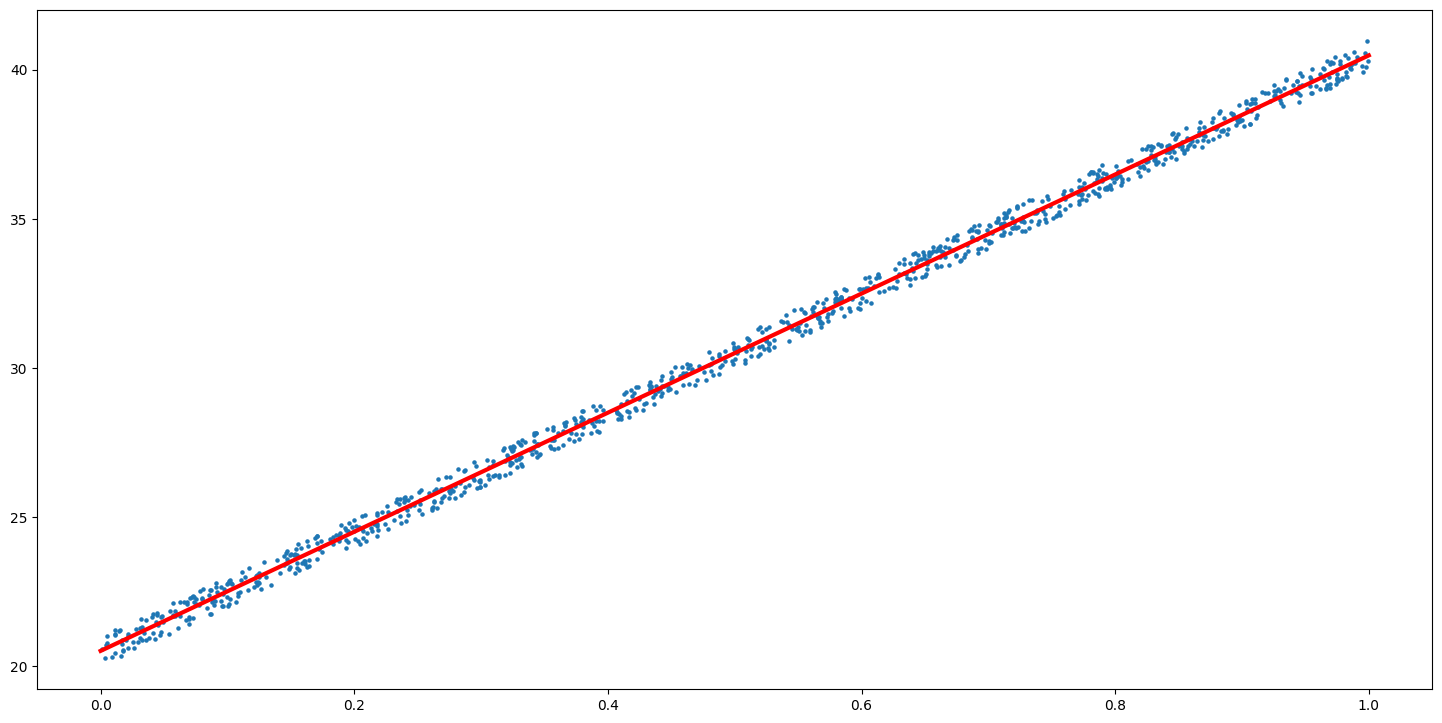

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(18, 9), dpi=100)
plt.scatter(X, y, s=5)
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w0 + w1*x0
plt.plot(x0, y0, 'r', linewidth = 3)

In [9]:
# Ta sẽ kiểm tra lại bằng Linear Regression trong thư viện scikit-learn

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
print(f'w1 = {model.coef_}\nw0 = {model.intercept_}')
print(f'J = {loss(model.coef_, model.intercept_)}')

w1 = [[19.95827147]]
w0 = [20.51998248]
J = [0.04242715]


In [11]:
# Công thức tính bằng đại số tuyến tính trên blog machinelearningcoban của anh Tiệp

one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)

print(f'w1 = {w_lr.T[0][1]}\nw0 = {w_lr.T[0][0]}')
print(f'J = {loss(w_lr.T[0][1], w_lr.T[0][0])}')

w1 = 19.95827146798369
w0 = 20.519982475087495
J = [0.04242715]
